In [138]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
from plotly.subplots import make_subplots


In [139]:
#start = datetime.datetime(2014,3,5)
#end = datetime.datetime(2024,3,4)
start_date = '2014-03-05'
end_date = '2024-03-05'


In [140]:
#set ticker lists
tickers = ['AMZN','AAPL','META','NFLX']

In [141]:
# Create placeholder for data
data = pd.DataFrame(columns=tickers)


In [142]:
# Fetch the data
for ticker in tickers:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Close']
    
# Print first 5 rows of the data
data.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AMZN,AAPL,META,NFLX
Date,,,,
2014-03-05,18.618500,19.012857,71.570000,64.785713
2014-03-06,18.608000,18.955357,70.839996,64.358574
2014-03-07,18.603001,18.944286,69.800003,64.052856
2014-03-10,18.526501,18.961430,72.029999,62.849998
2014-03-11,18.441000,19.146070,70.099998,62.497143
2014-03-12,18.532000,19.164642,70.879997,62.368572
2014-03-13,18.575500,18.951786,68.830002,61.437141
2014-03-14,18.687000,18.738930,67.720001,60.641430
2014-03-17,18.752001,18.812143,68.739998,60.388573


In [143]:
data.describe()

,AMZN,AAPL,META,NFLX
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,86.841694,80.748028,184.281657,282.709641
std,51.668508,57.391090,86.064636,167.100759
min,14.347500,18.498571,56.139999,44.887142
25%,38.007999,31.107500,117.949997,117.099998
50%,88.238503,50.180000,172.169998,294.070007
75%,130.380005,138.979996,232.500000,400.480011
max,186.570496,198.110001,502.299988,691.690002


In [144]:
data.info

<bound method DataFrame.info of                   AMZN        AAPL        META        NFLX
Date                                                      
2014-03-05   18.618500   19.012857   71.570000   64.785713
2014-03-06   18.608000   18.955357   70.839996   64.358574
2014-03-07   18.603001   18.944286   69.800003   64.052856
2014-03-10   18.526501   18.961430   72.029999   62.849998
2014-03-11   18.441000   19.146070   70.099998   62.497143
...                ...         ...         ...         ...
2024-02-27  173.539993  182.630005  487.049988  601.669983
2024-02-28  173.160004  181.419998  484.019989  596.479980
2024-02-29  176.759995  180.750000  490.130005  602.919983
2024-03-01  178.220001  179.660004  502.299988  619.340027
2024-03-04  177.580002  175.100006  498.190002  615.830017

[2517 rows x 4 columns]>

In [145]:
# Check if data contains any null values
data.isnull().sum()

AMZN    0
AAPL    0
META    0
NFLX    0
dtype: int64

In [146]:
# Getting dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-03-05 to 2024-03-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    2517 non-null   float64
 1   AAPL    2517 non-null   float64
 2   META    2517 non-null   float64
 3   NFLX    2517 non-null   float64
dtypes: float64(4)
memory usage: 98.3 KB


PLOT THE DATA

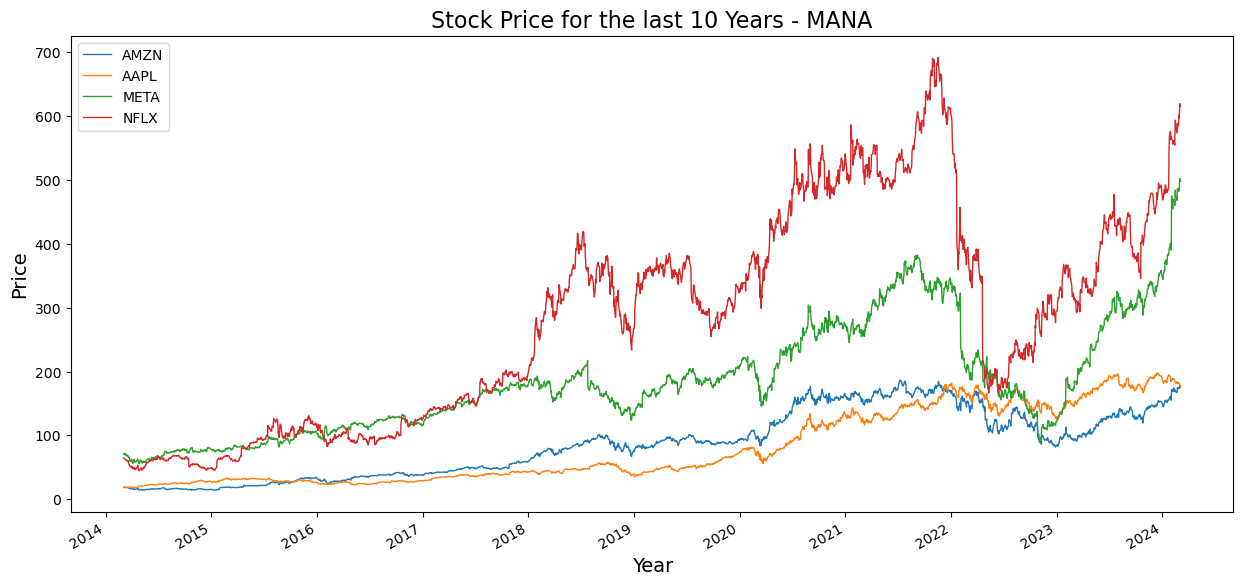

In [149]:
# Define a function to plot the entire dataframe
# Plot all the Closing Stock Price
data.plot(figsize = (15,7), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()

INTERACTIVE DATA VISUALIZATION

In [150]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# def interactive_plot(column):
# Plots the closing price for the chosen column and shows the corresponding legend.

def interactive_plot(column):
  fig, ax = plt.subplots(figsize=(10, 5), linewidth = 1)
  data[column].plot(ax=ax)
  
  # Legend handling and display all legend elements
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, labels)  


  plt.title("Stock Prices for the last 10 years", fontsize=16)
  plt.ylabel('Price', fontsize=14)
  plt.xlabel('Year', fontsize=14)
  plt.show()

# Create interactive widget to choose a column
interact(interactive_plot, column=data.columns[0:])  # Start from first column



interactive(children=(Dropdown(description='column', options=('AMZN', 'AAPL', 'META', 'NFLX'), value='AMZN'), …

<function __main__.interactive_plot(column)>

In [151]:
from ipywidgets import interact, Button

def interactive_plot(column):
  
  # Plots the closing price for the chosen column with a unique color and shows the corresponding legend.
  
  fig, ax = plt.subplots(figsize=(10, 5), linewidth = 1)

  # Create a colormap for generating unique colors
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (adjust as needed)
  colors = cmap(range(len(data.columns[0:])))  # Create colors for each column

  # Explicitly plot the line and set its color based on the column
  line, = ax.plot(data[column], label=column, color=colors[data.columns.tolist().index(column) - 0])

  # Display the legend
  ax.legend()
  # return fig, ax # Return the updated figure and axes

#Callback function for the save button to export the current plot as a JPEG file.
# def save_plot(b):
# fig.savefig("interactive_plot.jpg", format="jpg")  # Adjust filename as needed

  plt.title("Stock Price for the last 10 years", fontsize=16)
  plt.ylabel('Price', fontsize=14)
  plt.xlabel('Year', fontsize=14)
  plt.show()

# Add a button for saving the plot
# save_button = Button(description="Save plot")
# save_button.on_click(save_plot)

interact(interactive_plot, column=data.columns[0:])  # Start from first column
# display(save_button)  # Display the button

interactive(children=(Dropdown(description='column', options=('AMZN', 'AAPL', 'META', 'NFLX'), value='AMZN'), …

<function __main__.interactive_plot(column)>

STOCK NORMALISATION calculated in a min max scalling

In [129]:
# Stock normalisation used in this calculation is a min max scalling.

def normalize(data):
    x = data.copy() # creates a copy of the input dataframe, to ensure that original data in dataframe remains unchanged
    for i in x.columns[0:]: # iterates through the column from the beginning of index (0) to the end
        x[i] = x[i]/x[i][0] # index (0) is used as a reference for the normalisation
    return x

In [133]:
print(normalize(data))

                AMZN      AAPL      META      NFLX
Date                                              
2014-03-05  1.000000  1.000000  1.000000  1.000000
2014-03-06  0.999436  0.996976  0.989800  0.993407
2014-03-07  0.999168  0.996393  0.975269  0.988688
2014-03-10  0.995059  0.997295  1.006427  0.970121
2014-03-11  0.990466  1.007006  0.979461  0.964675
...              ...       ...       ...       ...
2024-02-27  9.320837  9.605605  6.805226  9.287078
2024-02-28  9.300427  9.541964  6.762889  9.206968
2024-02-29  9.493783  9.506725  6.848261  9.306373
2024-03-01  9.572200  9.449395  7.018304  9.559824
2024-03-04  9.537826  9.209558  6.960878  9.505645

[2517 rows x 4 columns]


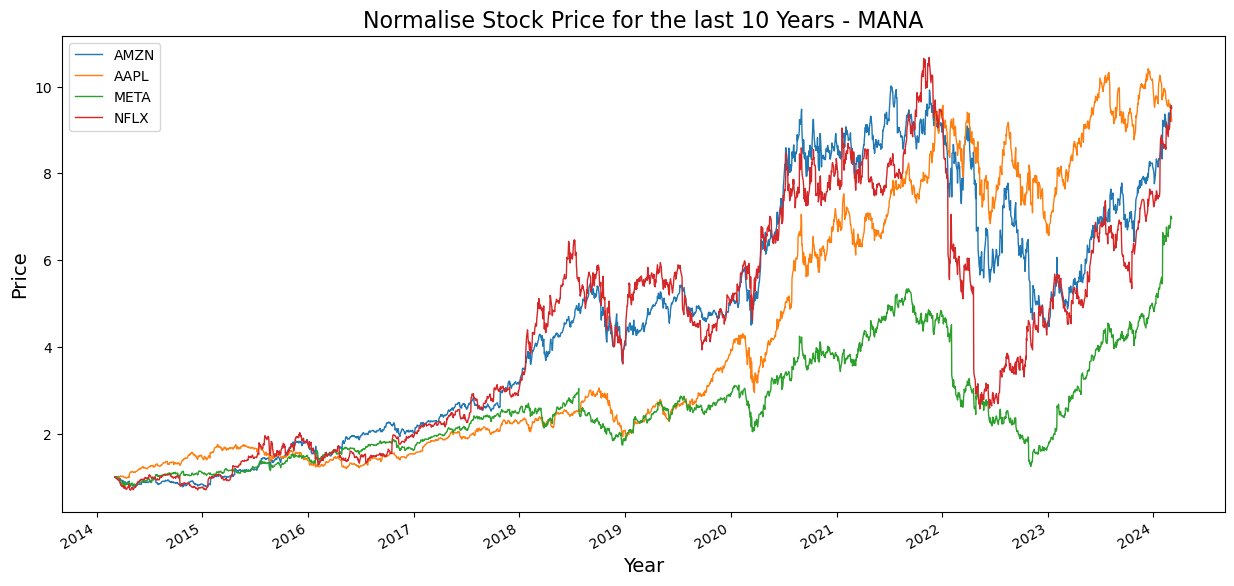

In [152]:

# show_plot(normalize(data), 'Stock Prices - Normalised')

normalize(data).plot(figsize = (15,7), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Normalised Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()


In [ ]:
# Define a function to plot the entire dataframe
# Plot all the Closing Stock Price
data.plot(figsize = (150,7), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Stock Price for the last 10 Years", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()

200 days normalisation

In [169]:
# import pandas as pd

def calculate_200day_ma(data):
  # """
  # Calculates the 20-day moving average for each column in the DataFrame.

  # Args:
  #     data: A Pandas DataFrame containing the data.

  # Returns:
  #     A new Pandas DataFrame with a '20d_MA' column added for each original column.
  # """
  result = data.copy()  # Create a copy to avoid modifying original data
  window = 200  # Define the window size for moving average (20 days)

  # Add a new column for the 20-day moving average of each existing column
  for col in data.columns:
    result['{}_200d_MA'.format(col)] = data[col].rolling(window=window).mean()

  return result


In [170]:
print(calculate_200day_ma(data))

                  AMZN        AAPL        META        NFLX  AMZN_200d_MA  \
Date                                                                       
2014-03-05   18.618500   19.012857   71.570000   64.785713           NaN   
2014-03-06   18.608000   18.955357   70.839996   64.358574           NaN   
2014-03-07   18.603001   18.944286   69.800003   64.052856           NaN   
2014-03-10   18.526501   18.961430   72.029999   62.849998           NaN   
2014-03-11   18.441000   19.146070   70.099998   62.497143           NaN   
...                ...         ...         ...         ...           ...   
2024-02-27  173.539993  182.630005  487.049988  601.669983     139.22015   
2024-02-28  173.160004  181.419998  484.019989  596.479980     139.52505   
2024-02-29  176.759995  180.750000  490.130005  602.919983     139.85755   
2024-03-01  178.220001  179.660004  502.299988  619.340027     140.19265   
2024-03-04  177.580002  175.100006  498.190002  615.830017     140.51355   

           

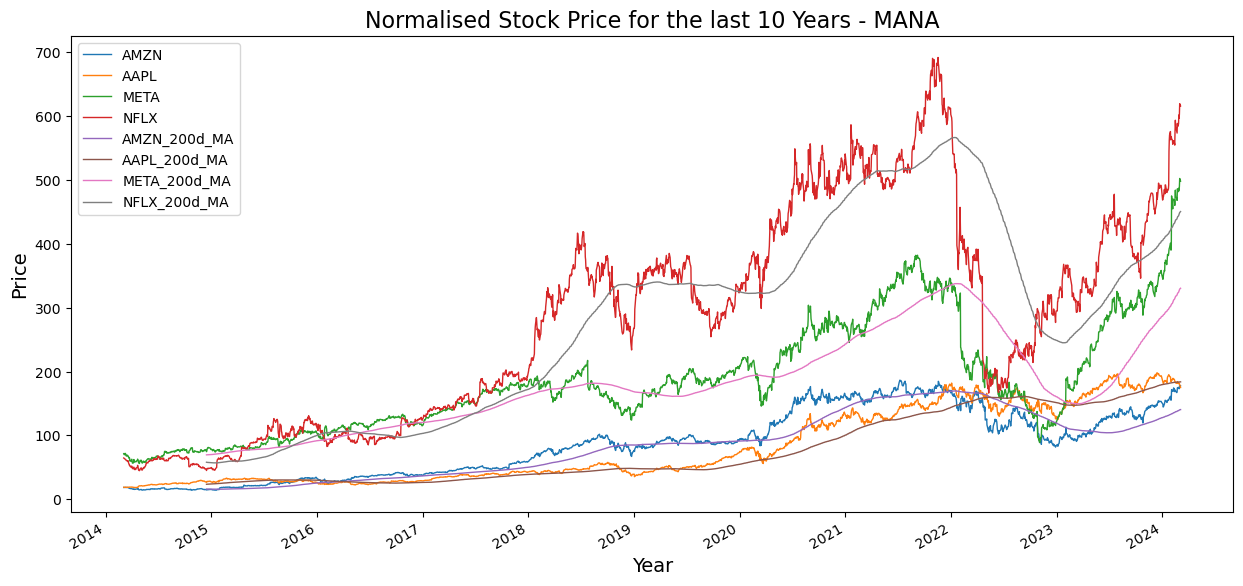

In [171]:
# Plot on Normalised Stock

calculate_200day_ma(data).plot(figsize = (15,7), linewidth = 1)

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Normalised Stock Price for the last 10 Years - MANA", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.show()

In [172]:
from ipywidgets import interact, Button

def interactive_plot1(column):
  
  # Plots the closing price for the chosen column with a unique color and shows the corresponding legend.
  
  fig, ax = plt.subplots(figsize=(10, 5), linewidth = 1)

  # Create a colormap for generating unique colors
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (adjust as needed)
  colors = cmap(range(len(calculate_200day_ma(data).columns[0:])))  # Create colors for each column

  # Explicitly plot the line and set its color based on the column
  line, = ax.plot(calculate_200day_ma(data)[column], label=column, color=colors[calculate_200day_ma(data).columns.tolist().index(column) - 0])

  # Display the legend
  ax.legend()
  # return fig, ax # Return the updated figure and axes

#Callback function for the save button to export the current plot as a JPEG file.
# def save_plot(b):
# fig.savefig("interactive_plot.jpg", format="jpg")  # Adjust filename as needed

  plt.title("Normalisation Stock Price for the last 10 years", fontsize=16)
  plt.ylabel('Price', fontsize=14)
  plt.xlabel('Year', fontsize=14)
  plt.show()

# Add a button for saving the plot
# save_button = Button(description="Save plot")
# save_button.on_click(save_plot)

interact(interactive_plot1, column=calculate_200day_ma(data).columns[0:])  # Start from first column
# display(save_button)  # Display the button

interactive(children=(Dropdown(description='column', options=('AMZN', 'AAPL', 'META', 'NFLX', 'AMZN_200d_MA', …

<function __main__.interactive_plot1(column)>